# Import Packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, chi2
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics, svm
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, precision_score, recall_score
from datetime import datetime
from datetime import date
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn import pipeline

# Importing Data Using Pandas:

In [2]:
df_cf = pd.read_csv('cf.csv')

In [3]:
df_cf

,sub_id,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,date_of_birth
0,1000,1,90.00,No,Option 2,No,02/10/1992
1,1001,1,168.00,Yes,Option 3,Yes,26/07/1996
2,1002,0,0.00,No,Option 3,Yes,17/07/1973
3,1003,3,112.00,No,Option 3,No,24/01/1975
4,1004,5,143.97,NaN,NaN,NaN,26/02/1997
...,...,...,...,...,...,...,...
42411,43411,0,0.00,NaN,NaN,NaN,NaN
42412,43412,0,0.00,NaN,NaN,NaN,NaN
42413,43413,0,0.00,NaN,NaN,NaN,NaN
42414,43414,0,0.00,NaN,NaN,NaN,NaN


In [4]:
df_cf.isnull().sum()

sub_id                  0
orders_count            0
total_spent             0
used_fin_or_prop    22017
hair_loss_level     22016
used_min_or_reg     22017
date_of_birth        1680
dtype: int64

In [5]:
df_bold = pd.read_csv('bold.csv')

In [6]:
df_bold.head()

,sub_id,paused,sub_date,order_count,city,billing,failed,failed_count,price,product,value,discount,refund_count
0,40344,1,10/01/2020,1,London,London,Yes,3.0,10.0,Non-Prescription Plan - Monthly Subscription -...,0.0,0.0,0.0
1,43294,1,14/01/2020,1,London,London,Yes,2.0,10.0,Full Works - 1 month - 10.00 x 1,0.0,0.0,0.0
2,40344,0,23/01/2020,1,London,London,No,NaN,10.0,Non-Prescription Plan - Monthly Subscription -...,0.0,0.0,0.0
3,43255,0,06/02/2020,1,Winnipeg,Winnipeg,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,15.0,0.0,15.0
4,40344,0,06/02/2020,1,London,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,15.0,0.0,0.0


In [7]:
df_merged = df_bold.merge(df_cf, how='inner', on='sub_id')

In [8]:
df_merged.head()

,sub_id,paused,sub_date,order_count,city,billing,failed,failed_count,price,product,value,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,date_of_birth
0,40344,1,10/01/2020,1,London,London,Yes,3.0,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN
1,40344,0,23/01/2020,1,London,London,No,NaN,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN
2,40344,0,06/02/2020,1,London,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,15.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN
3,40344,0,10/02/2020,1,London,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,7.97,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN
4,43294,1,14/01/2020,1,London,London,Yes,2.0,10.0,Full Works - 1 month - 10.00 x 1,0.00,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN


In [9]:
df_merged['city'].value_counts()['Glasgow']

312

In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25046 entries, 0 to 25045
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sub_id            25046 non-null  int64  
 1   paused            25046 non-null  int64  
 2   sub_date          25046 non-null  object 
 3   order_count       25046 non-null  int64  
 4   city              25039 non-null  object 
 5   billing           25044 non-null  object 
 6   failed            25046 non-null  object 
 7   failed_count      3774 non-null   float64
 8   price             25046 non-null  float64
 9   product           25046 non-null  object 
 10  value             25046 non-null  float64
 11  discount          25046 non-null  float64
 12  refund_count      25046 non-null  float64
 13  orders_count      25046 non-null  int64  
 14  total_spent       25046 non-null  float64
 15  used_fin_or_prop  13318 non-null  object 
 16  hair_loss_level   13319 non-null  object

In [11]:
df_merged.isnull().sum()

sub_id                  0
paused                  0
sub_date                0
order_count             0
city                    7
billing                 2
failed                  0
failed_count        21272
price                   0
product                 0
value                   0
discount                0
refund_count            0
orders_count            0
total_spent             0
used_fin_or_prop    11728
hair_loss_level     11727
used_min_or_reg     11728
date_of_birth         428
dtype: int64

In [12]:
df_merged['paused'].sum()

16868

In [13]:
df_merged

,sub_id,paused,sub_date,order_count,city,billing,failed,failed_count,price,product,value,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,date_of_birth
0,40344,1,10/01/2020,1,London,London,Yes,3.0,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.00,NaN,NaN,NaN,NaN
1,40344,0,23/01/2020,1,London,London,No,NaN,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.00,NaN,NaN,NaN,NaN
2,40344,0,06/02/2020,1,London,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,15.00,0.0,0.0,5,40.00,NaN,NaN,NaN,NaN
3,40344,0,10/02/2020,1,London,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,7.97,0.0,0.0,5,40.00,NaN,NaN,NaN,NaN
4,43294,1,14/01/2020,1,London,London,Yes,2.0,10.0,Full Works - 1 month - 10.00 x 1,0.00,0.0,0.0,1,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25041,5245,0,09/06/2022,1,Manchester,Manchester,No,NaN,39.0,Topical Finasteride-Minoxidil Spray - 1 month ...,36.99,6.0,0.0,1,36.99,Yes,Option 3,Yes,31/10/1986
25042,5152,0,09/06/2022,1,Brixham,Brixham,No,NaN,29.0,Finasteride - 1 month - 29.00 x 1,31.99,0.0,0.0,1,31.99,Yes,Option 2,Yes,10/10/1997
25043,5148,0,09/06/2022,1,Hastings,Hastings,No,NaN,30.0,Shampoo - 3 months - 30.00 x 1,32.99,0.0,0.0,1,32.99,NaN,NaN,NaN,28/12/1995
25044,5141,0,09/06/2022,1,Wrexham,Wrexham,No,NaN,44.0,Full Works - 1 month - 44.00 x 1,24.00,20.0,0.0,1,24.00,No,Option 2,No,19/09/1991


In [14]:
for i in df_merged.columns:
    if df_merged[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df_merged[i].value_counts())
        print()
        print()

sub_date

the values are:
29/11/2021    74
31/01/2021    74
11/01/2021    73
07/03/2021    71
27/03/2021    68
              ..
21/06/2021     1
01/02/2020     1
05/02/2020     1
31/12/2019     1
03/01/2020     1
Name: sub_date, Length: 895, dtype: int64


city

the values are:
London              4524
London               431
Manchester           382
Glasgow              312
Bristol              298
                    ... 
Warwickshire           1
Kirkby Overblow        1
Chipstead              1
SAXMUNDHAM             1
South Tyneside         1
Name: city, Length: 4646, dtype: int64


billing

the values are:
London                4344
London                 431
Manchester             363
Glasgow                316
Bristol                297
                      ... 
Porthmadog               1
SANDOWN                  1
Chalfont St Giles        1
West Kilbride            1
Balham                   1
Name: billing, Length: 4713, dtype: int64


failed

the values are:
No     22025
Ye

In [15]:
df_merged['product'].value_counts()

Full Works - 3 months - 102.00 x 1                                                                                            3359
Full Works - 1 month - 39.00 x 1                                                                                              3327
Full Works - 6 months - 198.00 x 1                                                                                            1538
Non-Prescription - 1 month - 32.00 x 1                                                                                        1339
Non-Prescription - 3 months - 75.00 x 1                                                                                       1244
                                                                                                                              ... 
Non-Prescription - 3 months - 75.00 x 1, Topical Finasteride-Minoxidil Spray - 3 months - 102.00 x 1                             1
Full Works - 3 months - 102.00 x 1, Finasteride - 3 months - 54.00 x 1             

In [16]:
df1 = df_merged

In [17]:
df1.head()

,sub_id,paused,sub_date,order_count,city,billing,failed,failed_count,price,product,value,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,date_of_birth
0,40344,1,10/01/2020,1,London,London,Yes,3.0,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN
1,40344,0,23/01/2020,1,London,London,No,NaN,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN
2,40344,0,06/02/2020,1,London,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,15.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN
3,40344,0,10/02/2020,1,London,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,7.97,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN
4,43294,1,14/01/2020,1,London,London,Yes,2.0,10.0,Full Works - 1 month - 10.00 x 1,0.00,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN


In [18]:
df2 = df1.drop(['billing'], axis=1)

In [19]:
df2.head()

,sub_id,paused,sub_date,order_count,city,failed,failed_count,price,product,value,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,date_of_birth
0,40344,1,10/01/2020,1,London,Yes,3.0,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN
1,40344,0,23/01/2020,1,London,No,NaN,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN
2,40344,0,06/02/2020,1,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,15.00,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN
3,40344,0,10/02/2020,1,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,7.97,0.0,0.0,5,40.0,NaN,NaN,NaN,NaN
4,43294,1,14/01/2020,1,London,Yes,2.0,10.0,Full Works - 1 month - 10.00 x 1,0.00,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN


In [20]:
df2.isnull().sum()

sub_id                  0
paused                  0
sub_date                0
order_count             0
city                    7
failed                  0
failed_count        21272
price                   0
product                 0
value                   0
discount                0
refund_count            0
orders_count            0
total_spent             0
used_fin_or_prop    11728
hair_loss_level     11727
used_min_or_reg     11728
date_of_birth         428
dtype: int64

In [21]:
df_tele = pd.read_csv('tele.csv')

In [22]:
df_tele.head()

,sub_id,date_of_birth,hair_loss_level,used_fin_or_prop,used_min_or_reg
0,14461,08/04/1983,Option 2,NO,NO
1,33412,11/11/1982,Option 2,NO,NO
2,27121,04/06/1985,Option 4,NO,NO
3,33535,07/05/1984,NaN,NO,NO
4,33536,05/02/1998,Option 2,NO,NO


In [23]:
df_tele.isnull().sum()

sub_id                0
date_of_birth       993
hair_loss_level     169
used_fin_or_prop      0
used_min_or_reg       0
dtype: int64

In [24]:
df_tele['used_fin_or_prop'] = df_tele['used_fin_or_prop'].str.lower()
df_tele['used_min_or_reg'] = df_tele['used_min_or_reg'].str.lower()

In [25]:
df_tele.head()

,sub_id,date_of_birth,hair_loss_level,used_fin_or_prop,used_min_or_reg
0,14461,08/04/1983,Option 2,no,no
1,33412,11/11/1982,Option 2,no,no
2,27121,04/06/1985,Option 4,no,no
3,33535,07/05/1984,NaN,no,no
4,33536,05/02/1998,Option 2,no,no


In [26]:
# encoding categorical variables:

enc = LabelEncoder()
df_tele['used_fin_or_prop'] = enc.fit_transform(df_tele['used_fin_or_prop'])
df_tele['used_min_or_reg'] = enc.fit_transform(df_tele['used_min_or_reg'])
df_tele['hair_loss_level'] = enc.fit_transform(df_tele['hair_loss_level'])

In [27]:
df_tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13289 entries, 0 to 13288
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sub_id            13289 non-null  int64 
 1   date_of_birth     12296 non-null  object
 2   hair_loss_level   13289 non-null  int32 
 3   used_fin_or_prop  13289 non-null  int32 
 4   used_min_or_reg   13289 non-null  int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 363.5+ KB


In [28]:
df_tele['date_of_birth'] = df_tele['date_of_birth'].astype('str')
df_tele['date_of_birth'] = pd.to_datetime(df_tele['date_of_birth'], dayfirst=True)

In [29]:
df_tele.head()

,sub_id,date_of_birth,hair_loss_level,used_fin_or_prop,used_min_or_reg
0,14461,1983-04-08,1,0,0
1,33412,1982-11-11,1,0,0
2,27121,1985-06-04,3,0,0
3,33535,1984-05-07,5,0,0
4,33536,1998-02-05,1,0,0


In [30]:
now = pd.to_datetime('now')
df_tele['age'] = (now - df_tele['date_of_birth']).astype('<m8[Y]')

In [31]:
df_tele.head()

,sub_id,date_of_birth,hair_loss_level,used_fin_or_prop,used_min_or_reg,age
0,14461,1983-04-08,1,0,0,39.0
1,33412,1982-11-11,1,0,0,39.0
2,27121,1985-06-04,3,0,0,37.0
3,33535,1984-05-07,5,0,0,38.0
4,33536,1998-02-05,1,0,0,24.0


In [32]:
df_tele.isnull().sum()

sub_id                0
date_of_birth       993
hair_loss_level       0
used_fin_or_prop      0
used_min_or_reg       0
age                 993
dtype: int64

In [33]:
df_tele.describe()

,sub_id,hair_loss_level,used_fin_or_prop,used_min_or_reg,age
count,1.328900e+04,13289.000000,13289.000000,13289.000000,12296.000000
mean,2.515087e+06,1.813304,0.139213,0.229212,34.060589
std,1.266426e+07,1.089390,0.346182,0.420342,9.392303
min,1.015000e+03,0.000000,0.000000,0.000000,17.000000
25%,2.184300e+04,1.000000,0.000000,0.000000,27.000000
50%,3.319200e+04,2.000000,0.000000,0.000000,32.000000
75%,3.842000e+04,2.000000,0.000000,0.000000,39.000000
max,9.995834e+07,5.000000,1.000000,1.000000,86.000000


In [34]:
df_tele['age'] = df_tele['age'].fillna(df_tele['age'].median())

In [35]:
df_tele.isnull().sum()

sub_id                0
date_of_birth       993
hair_loss_level       0
used_fin_or_prop      0
used_min_or_reg       0
age                   0
dtype: int64

In [36]:
df2['used_min_or_reg'] = enc.fit_transform(df2['used_min_or_reg'])
df2['used_fin_or_prop'] = enc.fit_transform(df2['used_fin_or_prop'])
df2['hair_loss_level'] = enc.fit_transform(df2['hair_loss_level'])

In [37]:
df2.isnull().sum()

sub_id                  0
paused                  0
sub_date                0
order_count             0
city                    7
failed                  0
failed_count        21272
price                   0
product                 0
value                   0
discount                0
refund_count            0
orders_count            0
total_spent             0
used_fin_or_prop        0
hair_loss_level         0
used_min_or_reg         0
date_of_birth         428
dtype: int64

In [38]:
df2['sub_month'] = pd.to_datetime(df2['sub_date'], dayfirst=True).dt.month

In [39]:
df2.head()

,sub_id,paused,sub_date,order_count,city,failed,failed_count,price,product,value,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,date_of_birth,sub_month
0,40344,1,10/01/2020,1,London,Yes,3.0,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,2,5,2,NaN,1
1,40344,0,23/01/2020,1,London,No,NaN,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,2,5,2,NaN,1
2,40344,0,06/02/2020,1,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,15.00,0.0,0.0,5,40.0,2,5,2,NaN,2
3,40344,0,10/02/2020,1,London,No,NaN,15.0,Non-Prescription Plan - Monthly Subscription -...,7.97,0.0,0.0,5,40.0,2,5,2,NaN,2
4,43294,1,14/01/2020,1,London,Yes,2.0,10.0,Full Works - 1 month - 10.00 x 1,0.00,0.0,0.0,1,0.0,2,5,2,NaN,1


In [40]:
tele_ids = list(df_tele['sub_id'])
df2_ids = list(df2['sub_id'])

In [41]:
tele_indices = []
df2_indices = []
for i in range(len(tele_ids)):
    if tele_ids[i] in df2_ids:
        tele_indices.append(i)
        df2_indices.append(df2_ids.index(tele_ids[i]))

In [42]:
print(len(tele_indices))
print(len(df2_indices))

7167
7167


In [43]:
for i in range(len(df2_indices)):
    df2.iloc[[df2_indices[i]], [13]] = df_tele.iloc[[tele_indices[i]], [3]].values[0][0]
    df2.iloc[[df2_indices[i]], [14]] = df_tele.iloc[[tele_indices[i]], [2]].values[0][0]
    df2.iloc[[df2_indices[i]], [15]] = df_tele.iloc[[tele_indices[i]], [4]].values[0][0]
    #df2.iloc[[df2_indices[i]], [16]] = df_tele.iloc[[tele_indices[i]], [1]].values[0][0]

In [44]:
df2.isnull().sum()

sub_id                  0
paused                  0
sub_date                0
order_count             0
city                    7
failed                  0
failed_count        21272
price                   0
product                 0
value                   0
discount                0
refund_count            0
orders_count            0
total_spent             0
used_fin_or_prop        0
hair_loss_level         0
used_min_or_reg         0
date_of_birth         428
sub_month               0
dtype: int64

In [45]:
df = df2.drop('sub_id', axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25046 entries, 0 to 25045
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   paused            25046 non-null  int64  
 1   sub_date          25046 non-null  object 
 2   order_count       25046 non-null  int64  
 3   city              25039 non-null  object 
 4   failed            25046 non-null  object 
 5   failed_count      3774 non-null   float64
 6   price             25046 non-null  float64
 7   product           25046 non-null  object 
 8   value             25046 non-null  float64
 9   discount          25046 non-null  float64
 10  refund_count      25046 non-null  float64
 11  orders_count      25046 non-null  int64  
 12  total_spent       25046 non-null  float64
 13  used_fin_or_prop  25046 non-null  int32  
 14  hair_loss_level   25046 non-null  int32  
 15  used_min_or_reg   25046 non-null  int32  
 16  date_of_birth     24618 non-null  object

In [47]:
df['date_of_birth'] = df['date_of_birth'].astype('str')
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], dayfirst=True)
now = pd.to_datetime('now')
df['age'] = (now - df['date_of_birth']).astype('<m8[Y]')

In [48]:
df.describe()

,paused,order_count,failed_count,price,value,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,sub_month,age
count,25046.000000,25046.000000,3774.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,25046.000000,24618.000000
mean,0.673481,3.740078,4.371224,70.221036,191.445247,12.098369,4.966656,5.085642,146.887172,1.159227,2.072187,1.170566,6.004631,33.264238
std,0.468949,4.300027,9.769066,50.695053,192.890971,32.403784,21.999343,5.603586,187.418368,1.007954,1.867389,0.858421,3.553237,9.300083
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,0.000000,1.000000,2.000000,34.000000,58.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,27.000000
50%,1.000000,2.000000,4.000000,51.000000,132.000000,0.000000,0.000000,3.000000,85.400000,1.000000,1.000000,1.000000,5.000000,31.000000
75%,1.000000,4.000000,4.000000,102.000000,259.985000,15.000000,0.000000,6.000000,209.775000,2.000000,5.000000,2.000000,9.000000,38.000000
max,1.000000,33.000000,179.000000,471.000000,1308.000000,1249.880000,432.000000,69.000000,1682.000000,5.000000,5.000000,2.000000,12.000000,102.000000


# Handling the Final Missing Values: 

In [49]:
df['age'] = df['age'].fillna(df['age'].median())
df['failed_count'] = df['failed_count'].fillna(0.0)

In [50]:
df.head()

,paused,sub_date,order_count,city,failed,failed_count,price,product,value,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,date_of_birth,sub_month,age
0,1,10/01/2020,1,London,Yes,3.0,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,2,5,2,NaT,1,31.0
1,0,23/01/2020,1,London,No,0.0,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.0,2,5,2,NaT,1,31.0
2,0,06/02/2020,1,London,No,0.0,15.0,Non-Prescription Plan - Monthly Subscription -...,15.00,0.0,0.0,5,40.0,2,5,2,NaT,2,31.0
3,0,10/02/2020,1,London,No,0.0,15.0,Non-Prescription Plan - Monthly Subscription -...,7.97,0.0,0.0,5,40.0,2,5,2,NaT,2,31.0
4,1,14/01/2020,1,London,Yes,2.0,10.0,Full Works - 1 month - 10.00 x 1,0.00,0.0,0.0,1,0.0,2,5,2,NaT,1,31.0


In [51]:
df.isnull().sum()

paused                0
sub_date              0
order_count           0
city                  7
failed                0
failed_count          0
price                 0
product               0
value                 0
discount              0
refund_count          0
orders_count          0
total_spent           0
used_fin_or_prop      0
hair_loss_level       0
used_min_or_reg       0
date_of_birth       428
sub_month             0
age                   0
dtype: int64

In [52]:
df['failed'] = enc.fit_transform(df['failed'])

In [53]:
df = df.drop(['sub_date', 'date_of_birth'], axis=1)
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

city

the values are:
London              4524
London               431
Manchester           382
Glasgow              312
Bristol              298
                    ... 
Warwickshire           1
Kirkby Overblow        1
Chipstead              1
SAXMUNDHAM             1
South Tyneside         1
Name: city, Length: 4646, dtype: int64


product

the values are:
Full Works - 3 months - 102.00 x 1                                                                                            3359
Full Works - 1 month - 39.00 x 1                                                                                              3327
Full Works - 6 months - 198.00 x 1                                                                                            1538
Non-Prescription - 1 month - 32.00 x 1                                                                                        1339
Non-Prescription - 3 months - 75.00 x 1                                                                          

In [54]:
df['city'].value_counts()['London']

4524

In [55]:
df['city'] = df['city'].fillna(method='ffill')
city_tiers = []
for city in df['city']:
    if df['city'].value_counts()[city]>300:
        city_tiers.append(1)
    elif df['city'].value_counts()[city]>100:
        city_tiers.append(2)
    elif df['city'].value_counts()[city]>5:
        city_tiers.append(3)
    else:
        city_tiers.append(4)

In [56]:
len(city_tiers)

25046

In [57]:
df['city_tier'] = city_tiers

In [58]:
df['city_tier'].value_counts()

3    10167
4     6562
1     5653
2     2664
Name: city_tier, dtype: int64

In [59]:
# note hair loss level 5 is actually corresponding to N/A
df = df.drop('city', axis=1)
df

,paused,order_count,failed,failed_count,price,product,value,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,sub_month,age,city_tier
0,1,1,1,3.0,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.00,2,5,2,1,31.0,1
1,0,1,0,0.0,10.0,Non-Prescription Plan - Monthly Subscription -...,0.00,0.0,0.0,5,40.00,2,5,2,1,31.0,1
2,0,1,0,0.0,15.0,Non-Prescription Plan - Monthly Subscription -...,15.00,0.0,0.0,5,40.00,2,5,2,2,31.0,1
3,0,1,0,0.0,15.0,Non-Prescription Plan - Monthly Subscription -...,7.97,0.0,0.0,5,40.00,2,5,2,2,31.0,1
4,1,1,1,2.0,10.0,Full Works - 1 month - 10.00 x 1,0.00,0.0,0.0,1,0.00,2,5,2,1,31.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25041,0,1,0,0.0,39.0,Topical Finasteride-Minoxidil Spray - 1 month ...,36.99,6.0,0.0,1,36.99,1,2,1,6,35.0,1
25042,0,1,0,0.0,29.0,Finasteride - 1 month - 29.00 x 1,31.99,0.0,0.0,1,31.99,1,1,1,6,24.0,4
25043,0,1,0,0.0,30.0,Shampoo - 3 months - 30.00 x 1,32.99,0.0,0.0,1,32.99,2,5,2,6,26.0,4
25044,0,1,0,0.0,44.0,Full Works - 1 month - 44.00 x 1,24.00,20.0,0.0,1,24.00,0,1,0,6,30.0,3


In [60]:
df['product'].value_counts()[0:30]

Full Works - 3 months - 102.00 x 1                             3359
Full Works - 1 month - 39.00 x 1                               3327
Full Works - 6 months - 198.00 x 1                             1538
Non-Prescription - 1 month - 32.00 x 1                         1339
Non-Prescription - 3 months - 75.00 x 1                        1244
Shampoo - 1 month - 10.00 x 1                                  1204
Minoxidil - 1 month - 20.00 x 1                                 917
Topical Finasteride-Minoxidil Spray - 3 months - 91.00 x 1      595
Topical Finasteride-Minoxidil Spray - 1 month - 35.00 x 1       552
Shampoo - 3 months - 24.00 x 1                                  508
Finasteride - 3 months - 54.00 x 1                              497
Finasteride - 1 month - 23.00 x 1                               469
Duo - 3 months - 90.00 x 1                                      464
Duo - 1 month - 34.00 x 1                                       441
Minoxidil - 3 months - 51.00 x 1                

In [61]:
prods = list(df['product'])

In [62]:
len(prods[7].split(' - '))

4

In [63]:
prod_list = []
type_list = []
for prod in prods:
    if len(prod.split(' - ')) == 4:
        prod_list.append(prod.split(' - ')[0])
        type_list.append(prod.split(' - ')[2])
    else:
        prod_list.append(prod.split(' - ')[0])
        type_list.append(prod.split(' - ')[1])

In [64]:
df['prod'] = prod_list
df['type'] = type_list

In [65]:
df['prod'].value_counts()

Full Works                                8696
Non-Prescription                          2888
Shampoo                                   2284
Minoxidil                                 1933
Topical Finasteride-Minoxidil Spray       1693
Finasteride                               1644
Duo                                       1301
Simplicity                                 680
Biotin & Finasteride Plan                  541
Gut Health Supplement                      480
No Shampoo plan                            459
Biotin                                     442
Combo                                      298
Topical Spray                              292
Nootropic Supplement                       226
Beard Booster                              195
No Biotin Plan                             155
Shampoo & Minoxidil Plan                   131
Biotin & Minoxidil Plan                    105
Shampoo & Finasteride Plan                 103
Immune Health Supplement                   100
PG Free Minox

In [66]:
df = df.replace({'Full Works Plan': 'Full Works', 
'Full Works Plan Test': 'Full Works', 
'PG Free Full Works': 'Full Works',
'PG Free Minoxidil': 'Minoxidil',
'Topical Finasteride and Minoxidil Plan': 'Topical Finasteride-Minoxidil Spray',
'Topical Spray': 'Minoxidil',
'Combo': 'Duo',
'Simplicity Plan': 'Simplicity',
'Combo Plan': 'Duo',
'PG Free Duo': 'Duo',
'Non-Prescription Plan': 'Non-Prescription',
'Oral Tablet': 'Finasteride',
'PG Free Non-Prescription': 'Non-Prescription'})

In [67]:
df = df.drop('product', axis=1)

In [68]:
df['type'].value_counts()

1 month                 11240
3 months                 9856
6 months                 3932
Monthly Subscription        9
LP299V                      9
Name: type, dtype: int64

In [69]:
df = df.replace({'Monthly Subscription': '1 month',
'LP299V': '1 month'})

In [70]:
df['type'].value_counts()

1 month     11258
3 months     9856
6 months     3932
Name: type, dtype: int64

In [71]:
df = df.replace(list(df['prod'].value_counts().keys())[8:], 'Other')

In [72]:
df['prod'].value_counts()

Full Works                             8797
Other                                  3004
Non-Prescription                       2932
Minoxidil                              2293
Shampoo                                2284
Topical Finasteride-Minoxidil Spray    1748
Finasteride                            1685
Duo                                    1621
Simplicity                              682
Name: prod, dtype: int64

In [73]:
df.head()

,paused,order_count,failed,failed_count,price,value,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,sub_month,age,city_tier,prod,type
0,1,1,1,3.0,10.0,0.00,0.0,0.0,5,40.0,2,5,2,1,31.0,1,Non-Prescription,1 month
1,0,1,0,0.0,10.0,0.00,0.0,0.0,5,40.0,2,5,2,1,31.0,1,Non-Prescription,1 month
2,0,1,0,0.0,15.0,15.00,0.0,0.0,5,40.0,2,5,2,2,31.0,1,Non-Prescription,1 month
3,0,1,0,0.0,15.0,7.97,0.0,0.0,5,40.0,2,5,2,2,31.0,1,Non-Prescription,1 month
4,1,1,1,2.0,10.0,0.00,0.0,0.0,1,0.0,2,5,2,1,31.0,1,Full Works,1 month


In [74]:
df['paused'].value_counts()

1    16868
0     8178
Name: paused, dtype: int64

In [75]:
df['city_tier'].value_counts()

3    10167
4     6562
1     5653
2     2664
Name: city_tier, dtype: int64

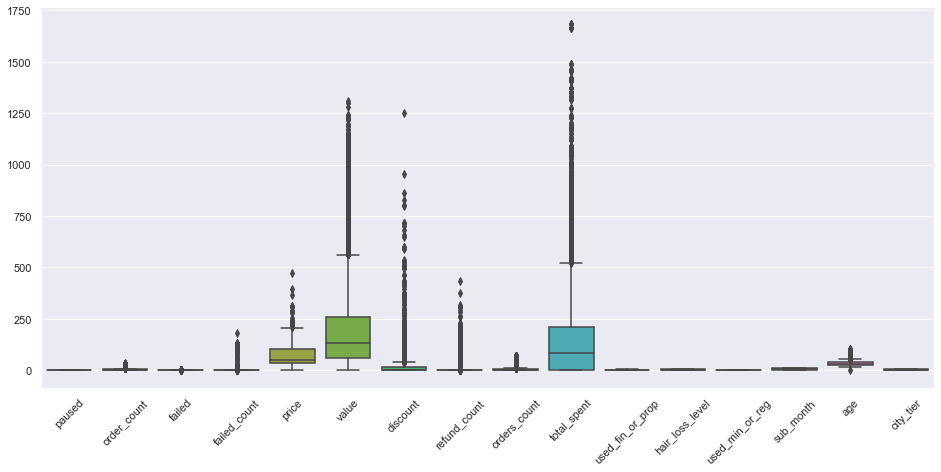

In [76]:
# checking for outliers:

sb.set(style='darkgrid', palette='muted')
fig, ax = plt.subplots(figsize=(16,7))
sb.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [77]:
list(df.columns)

['paused',
 'order_count',
 'failed',
 'failed_count',
 'price',
 'value',
 'discount',
 'refund_count',
 'orders_count',
 'total_spent',
 'used_fin_or_prop',
 'hair_loss_level',
 'used_min_or_reg',
 'sub_month',
 'age',
 'city_tier',
 'prod',
 'type']

In [78]:
cat = ['failed', 'used_fin_or_prop','hair_loss_level','used_min_or_reg','sub_month','city_tier','prod','type'] #categorical
num = ['order_count', 'failed_count','price','value','discount','refund_count','orders_count','total_spent','age'] #numerical

# Univariate Analysis:

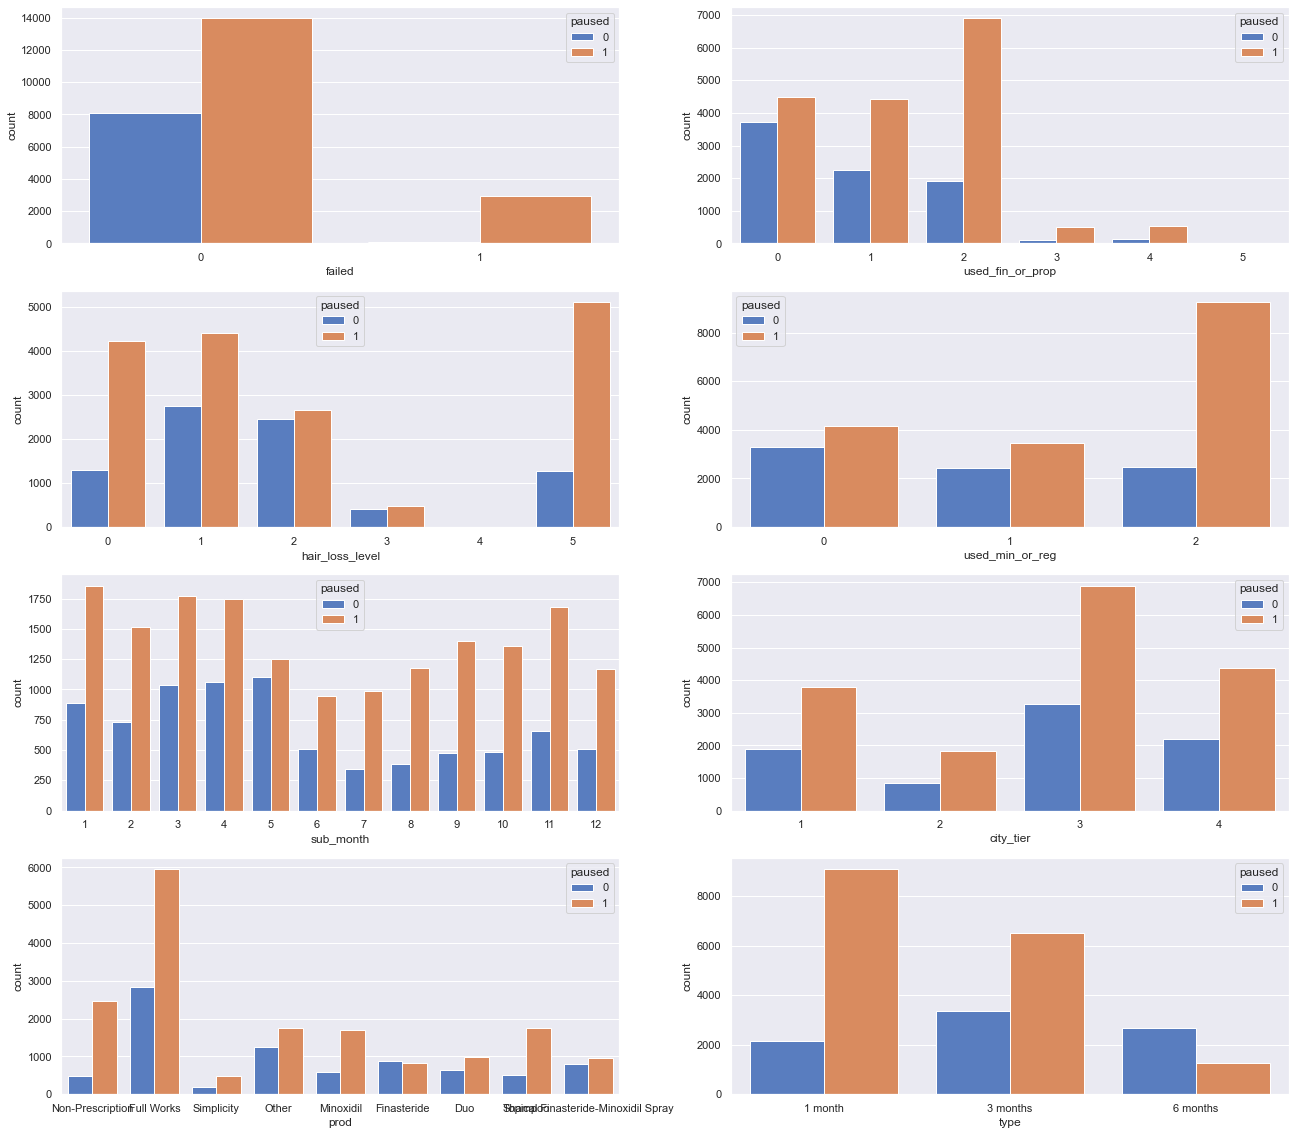

In [79]:
# Visualising categorical variables with their corresponding cancelled level:

fig,ax = plt.subplots(nrows=4,ncols=2,figsize=(22,20))
for col,subplot in zip(cat, ax.flatten()):
    sb.countplot(x = df[col], hue=df.paused, ax=subplot)

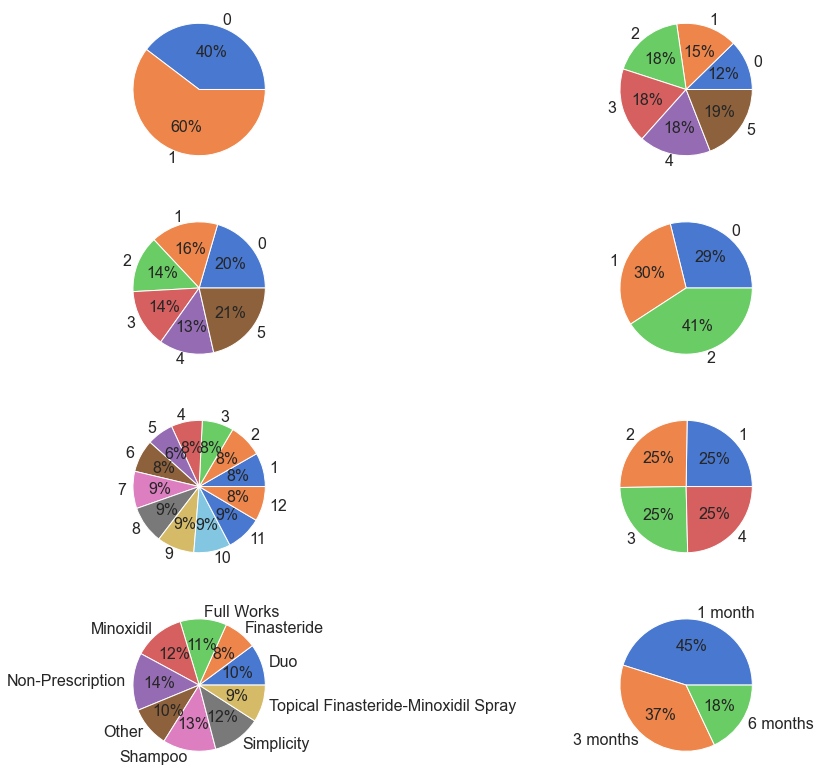

In [80]:
fig, ax = plt.subplots(4, 2, figsize=(16, 14))
plt.rcParams['font.size'] = '16'
for col,subplot in zip(cat, ax.flatten()):
    #calculate percent churn 
    temp = df.groupby(by=df[col]).paused.sum()
    total = df.value_counts(col).sort_index()
    res1 = temp/total*100
    #visualising the result
    subplot.pie(labels = res1.index, x = res1.values, autopct='%.0f%%',textprops={'fontsize': 16})

In [81]:
df['failed'].sum()

3021

In [82]:
df['paused'].value_counts()

1    16868
0     8178
Name: paused, dtype: int64

In [83]:
df.head()

,paused,order_count,failed,failed_count,price,value,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,sub_month,age,city_tier,prod,type
0,1,1,1,3.0,10.0,0.00,0.0,0.0,5,40.0,2,5,2,1,31.0,1,Non-Prescription,1 month
1,0,1,0,0.0,10.0,0.00,0.0,0.0,5,40.0,2,5,2,1,31.0,1,Non-Prescription,1 month
2,0,1,0,0.0,15.0,15.00,0.0,0.0,5,40.0,2,5,2,2,31.0,1,Non-Prescription,1 month
3,0,1,0,0.0,15.0,7.97,0.0,0.0,5,40.0,2,5,2,2,31.0,1,Non-Prescription,1 month
4,1,1,1,2.0,10.0,0.00,0.0,0.0,1,0.0,2,5,2,1,31.0,1,Full Works,1 month


In [84]:
df['monthly_spend'] = df['total_spent']/df['orders_count']

In [85]:
df.head()

,paused,order_count,failed,failed_count,price,value,discount,refund_count,orders_count,total_spent,used_fin_or_prop,hair_loss_level,used_min_or_reg,sub_month,age,city_tier,prod,type,monthly_spend
0,1,1,1,3.0,10.0,0.00,0.0,0.0,5,40.0,2,5,2,1,31.0,1,Non-Prescription,1 month,8.0
1,0,1,0,0.0,10.0,0.00,0.0,0.0,5,40.0,2,5,2,1,31.0,1,Non-Prescription,1 month,8.0
2,0,1,0,0.0,15.0,15.00,0.0,0.0,5,40.0,2,5,2,2,31.0,1,Non-Prescription,1 month,8.0
3,0,1,0,0.0,15.0,7.97,0.0,0.0,5,40.0,2,5,2,2,31.0,1,Non-Prescription,1 month,8.0
4,1,1,1,2.0,10.0,0.00,0.0,0.0,1,0.0,2,5,2,1,31.0,1,Full Works,1 month,0.0


In [86]:
df['monthly_spend'].describe()

count    25044.000000
mean        43.061159
std         47.608875
min          0.000000
25%          0.035714
50%         27.510217
75%         72.500000
max        389.000000
Name: monthly_spend, dtype: float64

In [87]:
df.isnull().sum()

paused              0
order_count         0
failed              0
failed_count        0
price               0
value               0
discount            0
refund_count        0
orders_count        0
total_spent         0
used_fin_or_prop    0
hair_loss_level     0
used_min_or_reg     0
sub_month           0
age                 0
city_tier           0
prod                0
type                0
monthly_spend       2
dtype: int64

In [88]:
df['monthly_spend'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
25041    False
25042    False
25043    False
25044    False
25045    False
Name: monthly_spend, Length: 25046, dtype: bool

In [89]:
df['orders_count'].describe()

count    25046.000000
mean         5.085642
std          5.603586
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         69.000000
Name: orders_count, dtype: float64

In [90]:
df['monthly_spend'] = df['monthly_spend'].fillna(0.0)

In [91]:
df.isnull().sum()

paused              0
order_count         0
failed              0
failed_count        0
price               0
value               0
discount            0
refund_count        0
orders_count        0
total_spent         0
used_fin_or_prop    0
hair_loss_level     0
used_min_or_reg     0
sub_month           0
age                 0
city_tier           0
prod                0
type                0
monthly_spend       0
dtype: int64

In [92]:
enc = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col]=enc.fit_transform(df[col])

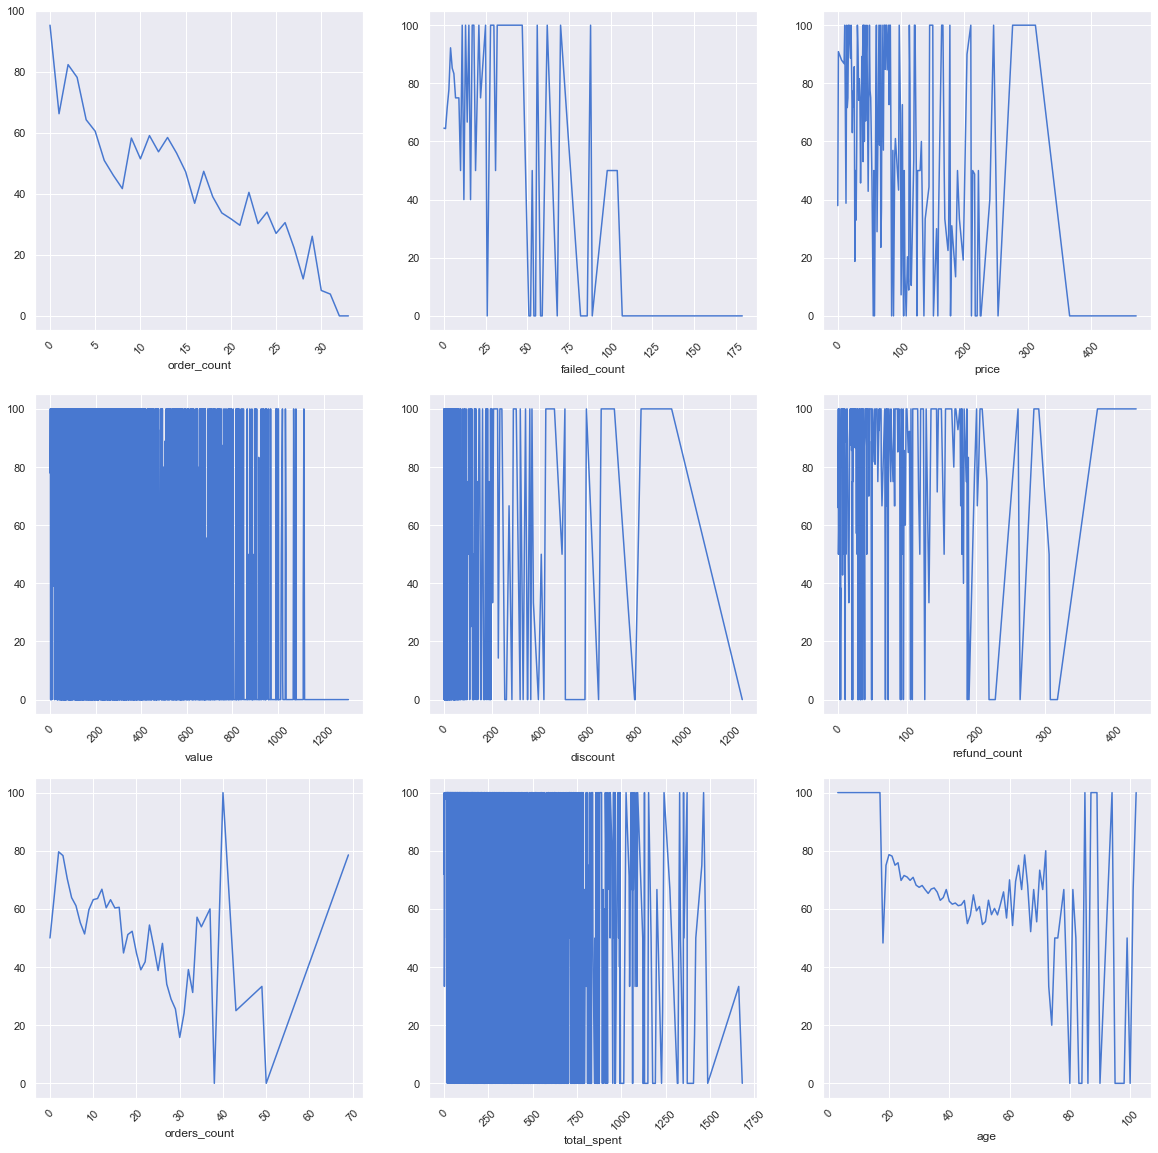

In [93]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for col,subplot in zip(num, ax.flatten()):
    temp = df.groupby(by=df[col]).paused.sum()
    total = df.value_counts(col).sort_index()
    res1 = temp/total*100
    sb.lineplot(x = res1.index, y = res1.values, ax=subplot, )
    subplot.tick_params(axis='x',labelrotation=45)

# Feature Selection:

### Pearson Correlation:

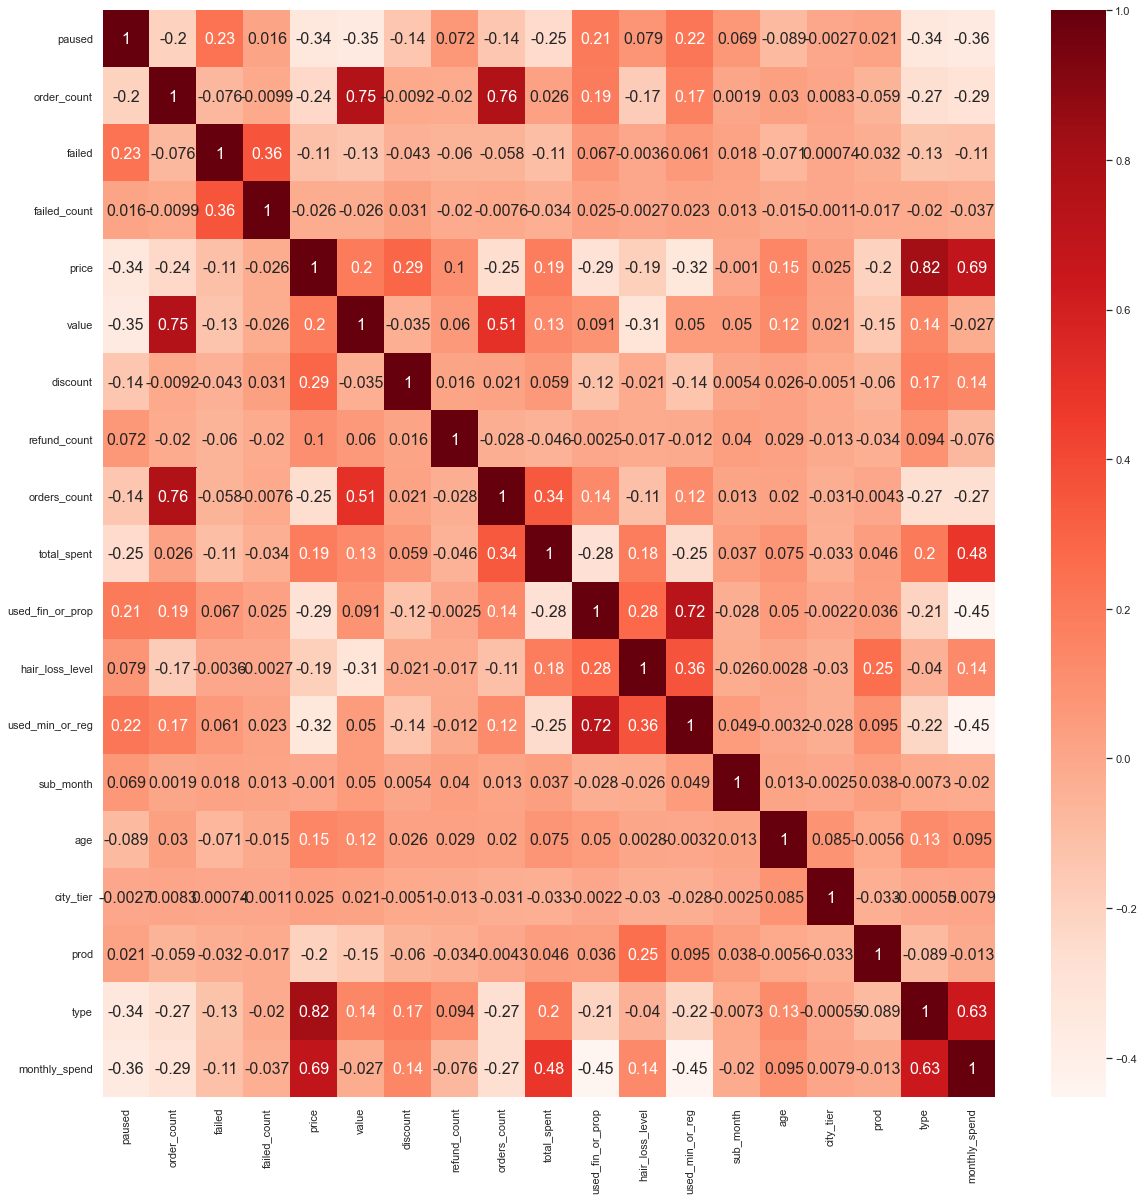

In [94]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = df.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [95]:
pearson_boolean = [abs(a)>0.2 for a in list(df.corr()['paused'])[1:]]
sum(pearson_boolean)

8

In [96]:
pearson = []
for i in range(len(pearson_boolean)):
    if pearson_boolean[i]:
        pearson.append(list(df.corr()['paused'].keys())[1:][i])

In [97]:
pearson

['failed',
 'price',
 'value',
 'total_spent',
 'used_fin_or_prop',
 'used_min_or_reg',
 'type',
 'monthly_spend']

### Recursive Feature Elimination:

In [98]:
X = df.drop('paused',axis=1)
y = df['paused'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

nof_list=np.arange(1,18)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression(max_iter=10000)
    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 15
Score with 15 features: 0.798509


In [99]:
cols = list(X.columns)
model = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=model, n_features_to_select=16)             
X_rfe = rfe.fit_transform(X,y)  
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['order_count', 'failed', 'failed_count', 'value', 'discount',
       'refund_count', 'orders_count', 'used_fin_or_prop', 'hair_loss_level',
       'used_min_or_reg', 'sub_month', 'age', 'city_tier', 'prod', 'type',
       'monthly_spend'],
      dtype='object')


### Random Forest (Embedded):

In [100]:
sel_rf = SelectFromModel(RandomForestClassifier(n_estimators = 150))
sel_rf.fit(X_train, y_train)
selected_feat_rf= X_train.columns[(sel_rf.get_support())]
len(selected_feat_rf)

8

In [101]:
print(selected_feat_rf)

Index(['order_count', 'price', 'value', 'orders_count', 'total_spent',
       'sub_month', 'age', 'monthly_spend'],
      dtype='object')


### Ridge Regression (Embedded):

In [102]:
sel_ridge = SelectFromModel(Ridge(max_iter=10000))
sel_ridge.fit(X_train, y_train)
selected_feat_ridge= X_train.columns[(sel_ridge.get_support())]
len(selected_feat_ridge)

4

In [103]:
print(selected_feat_ridge)

Index(['failed', 'used_fin_or_prop', 'used_min_or_reg', 'type'], dtype='object')


### Lasso:

In [104]:
sel_lasso = SelectFromModel(Lasso(max_iter=10000))
sel_lasso.fit(X_train, y_train)
selected_feat_lasso= X_train.columns[(sel_lasso.get_support())]
len(selected_feat_lasso)

5

In [105]:
print(selected_feat_lasso)

Index(['price', 'value', 'discount', 'total_spent', 'monthly_spend'], dtype='object')


In [106]:
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


### Tallying Up:

In [107]:
feature_df = pd.DataFrame({
    'Feature' : list(df.corr()['paused'].keys())[1:],
    'Pearsons' : pearson_boolean,
    'RFE' : rfe.support_,
    'RF' : sel_rf.get_support(),
    'Ridge' : sel_ridge.get_support(),
    'Lasso' : sel_lasso.get_support(),
    'Chi^2' : chi_support
})

feature_df['Total'] = np.sum(feature_df.drop('Feature', axis=1), axis=1)
feature_df = feature_df.sort_values(['Total','Feature'] , ascending=False)
feature_df.index = range(1, len(feature_df)+1)

feature_df

,Feature,Pearsons,RFE,RF,Ridge,Lasso,Chi^2,Total
1,value,True,True,True,False,True,True,5
2,monthly_spend,True,True,True,False,True,True,5
3,used_min_or_reg,True,True,False,True,False,True,4
4,used_fin_or_prop,True,True,False,True,False,True,4
5,type,True,True,False,True,False,True,4
6,total_spent,True,False,True,False,True,True,4
7,price,True,False,True,False,True,True,4
8,failed,True,True,False,True,False,True,4
9,order_count,False,True,True,False,False,True,3
10,sub_month,False,True,True,False,False,False,2


In [108]:
X_train = X_train.drop(['refund_count', 'prod', 'failed_count', 'city_tier', 'sub_month', 'orders_count', 'hair_loss_level', 'discount', 'age'], axis=1)
X_test = X_test.drop(['refund_count', 'prod', 'failed_count', 'city_tier', 'sub_month', 'orders_count', 'hair_loss_level', 'discount', 'age'], axis=1)

# Classification/Predictions:

In [109]:
class classif(BaseEstimator):

    def __init__(self, estimator=None):
        self.estimator = estimator
        
    def fit(self, X, y=None):
        self.estimator.fit(X,y)
        return self

    def predict(self, X, y=None):
        return self.estimator.predict(X,y)

    def predict_p(self, X):
        return self.estimator.predict_p(X)
        
    def score(self, X, y):
        return self.estimator.score(X, y)

In [110]:
flow = Pipeline([
    ('scaler', StandardScaler()),
('clf', classif())])

In [111]:
paramsLR = [{'clf':[LogisticRegression(max_iter=10000)],
               'clf__C':[0.0001,0.001,0.01,.1,1],
               'clf__solver':['lbfgs','liblinear']
               }]

paramsRF = [{'clf':[RandomForestClassifier()],
             'clf__n_estimators': [100,200,300,400],
              'clf__max_features': ['sqrt', 'log2'],
              'clf__max_depth' : [8,9,10,11],
             'clf__criterion':['gini','entropy'], 
             }]

paramsAda = [{'clf': [AdaBoostClassifier()],
              'clf__n_estimators': [300,400,500,600,700,800],
              'clf__learning_rate': [0.0001,0.001,0.01,.1,1]
             }]

paramsSVM = [{'clf': [svm.SVC()],
              'clf__C': [0.5,1,1.5,2],
              'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'clf__degree': [2,3,4],
              'clf__gamma': ['scale', 'auto']
            }]

### Logistic Regression:

In [112]:
grid_LR = GridSearchCV(flow, paramsLR, cv=5)
grid_LR.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', classif())]),
             param_grid=[{'clf': [LogisticRegression(C=1, max_iter=10000,
                                                     solver='liblinear')],
                          'clf__C': [0.0001, 0.001, 0.01, 0.1, 1],
                          'clf__solver': ['lbfgs', 'liblinear']}])

In [113]:
print(grid_LR.best_estimator_)
print(grid_LR.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(C=1, max_iter=10000, solver='liblinear'))])
0.7848508508205656


### Random Forest:

In [114]:
grid_RF = GridSearchCV(flow, paramsRF, cv=5)
grid_RF.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', classif())]),
             param_grid=[{'clf': [RandomForestClassifier(max_depth=11,
                                                         max_features='log2',
                                                         n_estimators=300)],
                          'clf__criterion': ['gini', 'entropy'],
                          'clf__max_depth': [8, 9, 10, 11],
                          'clf__max_features': ['sqrt', 'log2'],
                          'clf__n_estimators': [100, 200, 300, 400]}])

In [115]:
print(grid_RF.best_estimator_)
print(grid_RF.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=11, max_features='log2',
                                        n_estimators=300))])
0.8289415301903732


### AdaBoost:

In [116]:
grid_Ada = GridSearchCV(flow, paramsAda, cv=5)
grid_Ada.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', classif())]),
             param_grid=[{'clf': [AdaBoostClassifier(learning_rate=1,
                                                     n_estimators=800)],
                          'clf__learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                          'clf__n_estimators': [300, 400, 500, 600, 700, 800]}])

In [117]:
print(grid_Ada.best_estimator_)
print(grid_Ada.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', AdaBoostClassifier(learning_rate=1, n_estimators=800))])
0.8126282192358824


### Support Vector Machine:

In [118]:
grid_SVM = GridSearchCV(flow, paramsSVM, cv=5)
grid_SVM.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', classif())]),
             param_grid=[{'clf': [SVC(C=2, degree=2)],
                          'clf__C': [0.5, 1, 1.5, 2], 'clf__degree': [2, 3, 4],
                          'clf__gamma': ['scale', 'auto'],
                          'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [119]:
print(grid_SVM.best_estimator_)
print(grid_SVM.best_score_)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC(C=2, degree=2))])
0.8054416145298842


## Predicting with Classifiers:

##### Logistic Regression:

<AxesSubplot:>

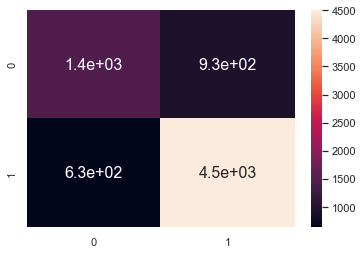

In [120]:
y_pred_LR = grid_LR.predict(X_test)
sb.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True)

In [121]:
print(accuracy_score(y_test,y_pred_LR))
print(precision_score(y_test,y_pred_LR))
print(recall_score(y_test,y_pred_LR))

0.7919882885280809
0.8290126861555432
0.8768961493582264


#### Random Forest:

In [122]:
y_pred_RF = grid_RF.predict(X_test)

<AxesSubplot:>

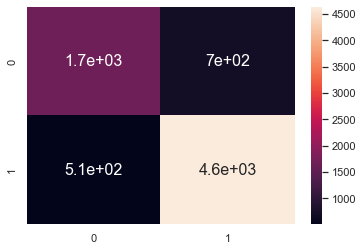

In [123]:
sb.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True)

In [124]:
print(accuracy_score(y_test,y_pred_RF))
print(precision_score(y_test,y_pred_RF))
print(recall_score(y_test,y_pred_RF))

0.8394996007452755
0.868815592203898
0.9015947102294827


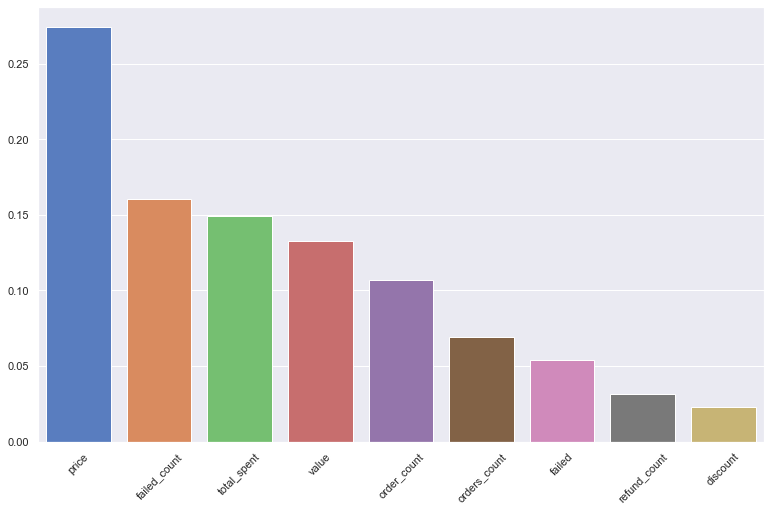

In [125]:
feature_array = grid_RF.best_estimator_[-1].feature_importances_
importance = dict(zip(df.drop('paused',axis=1).columns,feature_array))
importance = dict(sorted(importance.items(), key= lambda item:item[1],reverse = True) )
fig, ax = plt.subplots(figsize=(13,8))
sb.barplot(x=list(importance.keys()), y=list(importance.values()))
plt.tick_params(axis='x', labelrotation=45)
plt.show()

In [126]:
grid_RF.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_clf', 'param_clf__criterion', 'param_clf__max_depth', 'param_clf__max_features', 'param_clf__n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [127]:
pd.concat([pd.DataFrame(grid_RF.cv_results_["params"]),pd.DataFrame(grid_RF.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,clf,clf__criterion,clf__max_depth,clf__max_features,clf__n_estimators,Accuracy
0,"RandomForestClassifier(max_depth=11, max_featu...",gini,8,sqrt,100,0.815994
1,"RandomForestClassifier(max_depth=11, max_featu...",gini,8,sqrt,200,0.815652
2,"RandomForestClassifier(max_depth=11, max_featu...",gini,8,sqrt,300,0.815309
3,"RandomForestClassifier(max_depth=11, max_featu...",gini,8,sqrt,400,0.814796
4,"RandomForestClassifier(max_depth=11, max_featu...",gini,8,log2,100,0.814625
...,...,...,...,...,...,...
59,"RandomForestClassifier(max_depth=11, max_featu...",entropy,11,sqrt,400,0.826603
60,"RandomForestClassifier(max_depth=11, max_featu...",entropy,11,log2,100,0.826888
61,"RandomForestClassifier(max_depth=11, max_featu...",entropy,11,log2,200,0.826318
62,"RandomForestClassifier(max_depth=11, max_featu...",entropy,11,log2,300,0.827288


#### AdaBoost:

<AxesSubplot:>

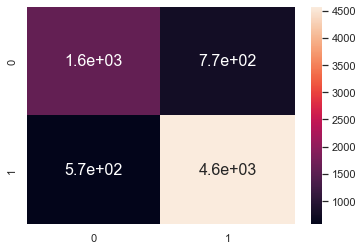

In [128]:
y_pred_Ada = grid_Ada.predict(X_test)
sb.heatmap(confusion_matrix(y_test, y_pred_Ada), annot=True)

In [129]:
print(accuracy_score(y_test,y_pred_Ada))
print(precision_score(y_test,y_pred_Ada))
print(recall_score(y_test,y_pred_Ada))

0.8211338834176204
0.8556179775280899
0.8885647607934656


#### Support Vector Machine:

<AxesSubplot:>

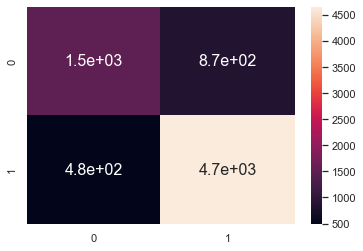

In [130]:
y_pred_SVM = grid_SVM.predict(X_test)
sb.heatmap(confusion_matrix(y_test, y_pred_SVM), annot=True)

In [131]:
print(accuracy_score(y_test,y_pred_SVM))
print(precision_score(y_test,y_pred_SVM))
print(recall_score(y_test,y_pred_SVM))

0.8191376097950492
0.8419815584885193
0.9056787242318164


In [132]:
confusion_matrix(y_test, y_pred_LR)

array([[1442,  930],
       [ 633, 4509]], dtype=int64)

In [133]:
confusion_matrix(y_test, y_pred_RF)

array([[1672,  700],
       [ 506, 4636]], dtype=int64)

In [134]:
confusion_matrix(y_test, y_pred_Ada)

array([[1601,  771],
       [ 573, 4569]], dtype=int64)

In [135]:
confusion_matrix(y_test, y_pred_SVM)

array([[1498,  874],
       [ 485, 4657]], dtype=int64)

In [136]:
roc_auc_score(y_test, y_pred_LR)

0.7424109751850154

In [137]:
roc_auc_score(y_test, y_pred_RF)

0.803242549043915

In [138]:
roc_auc_score(y_test, y_pred_Ada)

0.7817613011387227

In [139]:
roc_auc_score(y_test, y_pred_SVM)

0.7686066471074765